In [1]:
from pymodulon.core import IcaData
from pymodulon.visualization import *
from pymodulon.io import load_json_model, save_to_json
import pandas as pd

In [2]:
pd.set_option('display.max_rows', 200)

# Load IcaData object

In [468]:
ica_data = load_json_model('../data/precise2/precise2.json')

# Annotate iModulons

In [470]:
iM_to_annotate = ica_data.imodulon_names[12]
iM_to_annotate

'Membrane Stress'

## Plot Gene Weights

<AxesSubplot:xlabel='Gene Start', ylabel='12 Gene Weight'>

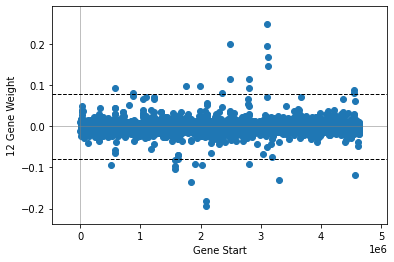

In [437]:
plot_gene_weights(ica_data,iM_to_annotate)

## Compute Regulator Enrichment

In [438]:
reg_enrichment = ica_data.compute_trn_enrichment(iM_to_annotate, max_regs=2, force=True)
reg_enrichment

,imodulon,regulator,pvalue,qvalue,precision,recall,f1score,TP,regulon_size,imodulon_size,n_regs


## Plot Regulator Histogram

<AxesSubplot:xlabel='191 Gene Weight', ylabel='Number of Genes'>

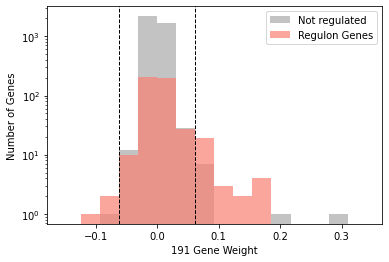

In [342]:
plot_regulon_histogram(ica_data, iM_to_annotate, reg_enrichment.loc[0, 'regulator'])

## Show Genes

In [439]:
imod_genes = ica_data.view_imodulon(iM_to_annotate)
imod_genes['length'] = imod_genes['end'] - imod_genes['start']
imod_genes.sort_values(by='gene_weight', ascending=False)

,gene_weight,gene_name,old_locus_tag,start,end,strand,gene_product,COG,uniprot,regulator,length
b2971,0.247276,yghG,NaN,3113067,3113477,-,lipoprotein YghG,Cell wall/membrane/envelope biogenesis,Q46835,NaN,410
b2369,0.200003,evgA,NaN,2483755,2484369,+,DNA-binding transcriptional activator EvgA,Transcription,P0ACZ4,"Sigma38,Sigma70,evgA,h-NS",614
b2970,0.195156,yghF,NaN,3112054,3112920,-,putative type II secretion system C-type protein,"Intracellular trafficking, secretion, and vesi...",None,"Sigma24,nac",866
b4466,0.167105,yghJ,NaN,3114550,3119112,-,putative lipoprotein YghJ,Cell wall/membrane/envelope biogenesis,P0CK95,NaN,4562
b2972,0.145785,pppA,NaN,3113543,3114352,-,prepilin peptidase,Cell motility,Q46836,NaN,809
b2370,0.115927,evgS,NaN,2484374,2487967,+,sensory histidine kinase EvgS,Signal transduction mechanisms,P30855,"Sigma38,Sigma70,evgA,h-NS",3593
b2683,0.113912,ygaH,NaN,2810344,2810679,+,L-valine exporter subunit YgaH,Function unknown,P43667,NaN,335
b1902,0.098478,ftnB,NaN,1986925,1987428,+,putative ferritin-like protein,Inorganic ion transport and metabolism,P0A9A2,"Sigma24,Sigma70,cpxR,fur,nac,trpR",503
b1675,0.098107,fumD,NaN,1754932,1755141,-,fumarase D,Function unknown,P0ACX5,cra,209
b0553,0.092710,nmpC,NaN,574529,574586,-,DLP12 prophage%3B putative outer membrane pori...,No COG annotation,None,NaN,57


## Plot iModulon Activities

<AxesSubplot:ylabel='12 iModulon\nActivity'>

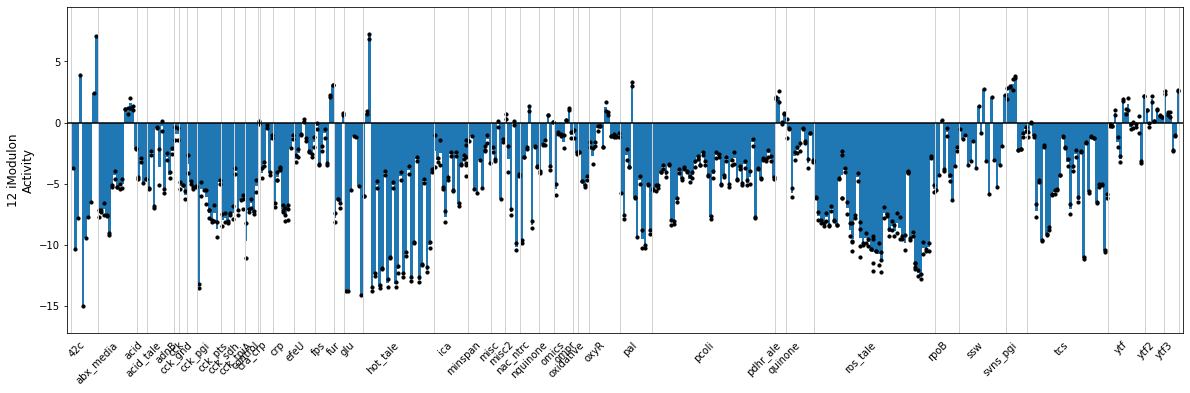

In [440]:
_, ax = plt.subplots(figsize=(20, 6))
plot_activities(ica_data,iM_to_annotate, ax=ax)

In [222]:
ica_data.sample_table[ica_data.sample_table['project'].isin(['crp'])].sort_values(by='condition')

,sample_id,study,project_id,project,condition_id,condition,rep_id,contact,creator,run_date,...,Notes,LibraryLayout,Platform,passed_fastqc,passed_pct_reads_mapped,passed_reads_mapped_to_CDS,passed_global_correlation,full_name,passed_similar_replicates,passed_number_replicates
ecoli_00455,tcs__del_atoC_LiAcet__1,Two Component Systems,tcs,tcs,del_atoC_LiAcet,del_atoC_LiAcet,1,Katherine Decker,Julia Kleinmanns,9/20/19,...,None,PAIRED,ILLUMINA,True,True,True,True,tcs:del_atoC_LiAcet,True,True
ecoli_00456,tcs__del_atoC_LiAcet__2,Two Component Systems,tcs,tcs,del_atoC_LiAcet,del_atoC_LiAcet,2,Katherine Decker,Julia Kleinmanns,9/20/19,...,None,PAIRED,ILLUMINA,True,True,True,True,tcs:del_atoC_LiAcet,True,True
ecoli_00457,tcs__del_atoC_LiCl__1,Two Component Systems,tcs,tcs,del_atoC_LiCl,del_atoC_LiCl,1,Katherine Decker,Julia Kleinmanns,9/20/19,...,None,PAIRED,ILLUMINA,True,True,True,True,tcs:del_atoC_LiCl,True,True
ecoli_00458,tcs__del_atoC_LiCl__2,Two Component Systems,tcs,tcs,del_atoC_LiCl,del_atoC_LiCl,2,Katherine Decker,Julia Kleinmanns,9/20/19,...,None,PAIRED,ILLUMINA,True,True,True,True,tcs:del_atoC_LiCl,True,True
ecoli_00459,tcs__del_atoC_m9__1,Two Component Systems,tcs,tcs,del_atoC_m9,del_atoC_m9,1,Katherine Decker,Julia Kleinmanns,9/20/19,...,None,PAIRED,ILLUMINA,True,True,True,True,tcs:del_atoC_m9,True,True
ecoli_00460,tcs__del_atoC_m9__2,Two Component Systems,tcs,tcs,del_atoC_m9,del_atoC_m9,2,Katherine Decker,Julia Kleinmanns,9/20/19,...,None,PAIRED,ILLUMINA,True,True,True,True,tcs:del_atoC_m9,True,True
ecoli_00461,tcs__del_baeR_etoh__1,Two Component Systems,tcs,tcs,del_baeR_etoh,del_baeR_etoh,1,Katherine Decker,Julia Kleinmanns,6/27/19,...,None,PAIRED,ILLUMINA,True,True,True,True,tcs:del_baeR_etoh,True,True
ecoli_00462,tcs__del_baeR_etoh__2,Two Component Systems,tcs,tcs,del_baeR_etoh,del_baeR_etoh,2,Katherine Decker,Julia Kleinmanns,6/27/19,...,None,PAIRED,ILLUMINA,True,True,True,True,tcs:del_baeR_etoh,True,True
ecoli_00463,tcs__del_baeR_lb__1,Two Component Systems,tcs,tcs,del_baeR_lb,del_baeR_lb,1,Katherine Decker,Julia Kleinmanns,6/27/19,...,None,PAIRED,ILLUMINA,True,True,True,True,tcs:del_baeR_lb,True,True
ecoli_00464,tcs__del_baeR_lb__2,Two Component Systems,tcs,tcs,del_baeR_lb,del_baeR_lb,2,Katherine Decker,Julia Kleinmanns,6/27/19,...,None,PAIRED,ILLUMINA,True,True,True,True,tcs:del_baeR_lb,True,True
